**PROCESSAMENTO DAS VARIAVEIS**
---

In [1]:
import pandas as pd

df= pd.read_csv("marketing_investimento.csv")

In [45]:
df.iloc[0]

idade                             45
estado_civil              casado (a)
escolaridade                superior
inadimplencia                    nao
saldo                            242
fez_emprestimo                   nao
tempo_ult_contato                587
numero_contatos                    1
aderencia_investimento           sim
Name: 0, dtype: object

In [3]:
# Separando as variáveis independentes (features) e dependente (target)
# x contém as variáveis explicativas (features)
# y contém a variável alvo (target), que é 'aderencia_investimento'

x = df.drop(columns='aderencia_investimento', axis=1)
y = df['aderencia_investimento']

In [4]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [5]:
colunas = x.columns

one_hot = make_column_transformer(
        (OneHotEncoder(drop='if_binary'),
         ['estado_civil', 'escolaridade', 'inadimplencia', 'fez_emprestimo']),

remainder='passthrough',  # As colunas restantes serão passadas sem transformação
sparse_threshold=0  # Isso faz com que a matriz codificada seja densa, não esparsa
)

x = one_hot.fit_transform(x)

In [6]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_solteiro (a)',
       'onehotencoder__escolaridade_fundamental',
       'onehotencoder__escolaridade_medio',
       'onehotencoder__escolaridade_superior',
       'onehotencoder__inadimplencia_sim',
       'onehotencoder__fez_emprestimo_sim', 'remainder__idade',
       'remainder__saldo', 'remainder__tempo_ult_contato',
       'remainder__numero_contatos'], dtype=object)

In [7]:
pd.DataFrame(x, columns = one_hot.get_feature_names_out(colunas))

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_solteiro (a),onehotencoder__escolaridade_fundamental,onehotencoder__escolaridade_medio,onehotencoder__escolaridade_superior,onehotencoder__inadimplencia_sim,onehotencoder__fez_emprestimo_sim,remainder__idade,remainder__saldo,remainder__tempo_ult_contato,remainder__numero_contatos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.0,83.0,1223.0,6.0
1264,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,5958.0,215.0,1.0
1265,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,30.0,-477.0,1532.0,2.0
1266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,2187.0,525.0,3.0


> **Transformando a variavel Target**
---

In [8]:
from sklearn.preprocessing import LabelEncoder

label_ecoder = LabelEncoder()

y = label_ecoder.fit_transform(y)

> **SEPARACAO DADOS DE TREINO E TESTE**

---

In [9]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, stratify=y, random_state=5)


> **ESCOLHENDO O MODELO**

O que é DummyClassifier?

O DummyClassifier é usado como referência ou baseline, baseando suas previsões em regras simples e sem considerar os recursos de entrada (X) — por exemplo, sempre prevendo a classe mais frequente no conjunto de treinamento (strategy='most_frequent') ou outras estratégias simples. É uma forma de verificar se um modelo mais complexo está, de fato, aprendendo algo útil ou apenas “batendo de bobeira” com base em padrões triviais

> **Dummy**

In [10]:
from sklearn.dummy import DummyClassifier

In [11]:
dummy = DummyClassifier()

dummy.fit(x_treino, y_treino)

dummy.score(x_teste, y_teste)

0.6025236593059937

> **Modelo arvore aleatoria**

In [12]:
from sklearn.tree import DecisionTreeClassifier

arvore = DecisionTreeClassifier(random_state=5)

arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(random_state=5)

In [13]:
arvore.predict(x_teste) # cada linha da previsão

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [14]:
arvore.score(x_teste,y_teste) 

0.6656151419558359

In [15]:
name_columns =['casado (a)',
 'divorciado (a)',
 'solteiro (a)',
 'fundamental',
 'medio',
 'superior',
 'inadimplencia',
 'fez_emprestimo',
 'idade',
 'saldo',
 'tempo_ult_contato',
 'numero_contatos']


In [16]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


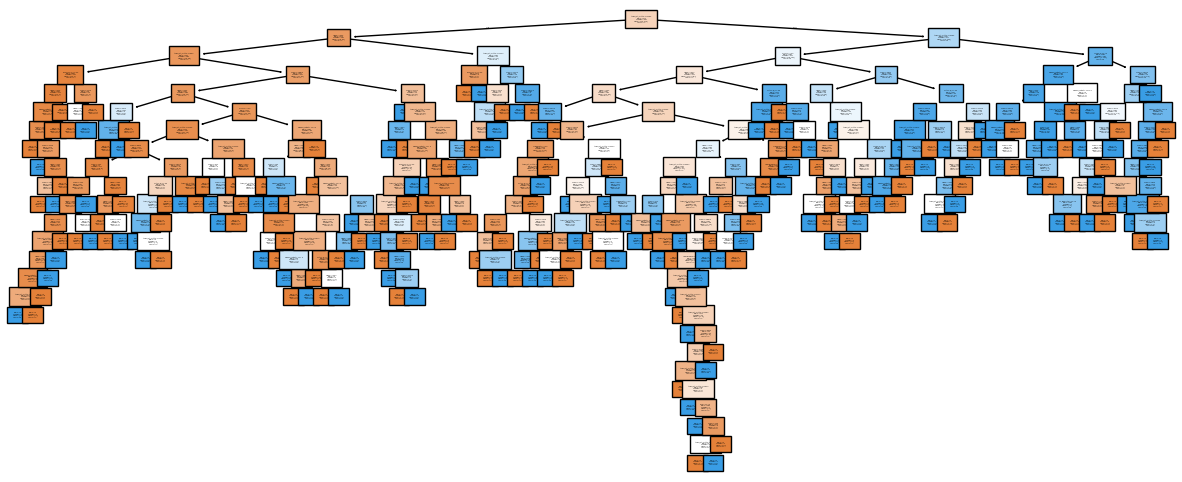

In [17]:
plt.figure(figsize=(15,6))

plot_tree(arvore,filled=True, class_names=['nao', 'sim'], fontsize=1, feature_names=name_columns);

## Interpretação
Esse comportamento — **100 % de acurácia no conjunto de treino** e **desempenho significativamente inferior no teste** — é um forte indício de **overfitting**: o modelo aprendeu profundamente os detalhes (inclusive o ruído) dos dados de treinamento, mas não consegue generalizar para novos dados.

- Overfitting ocorre quando um modelo se ajusta demais aos dados de treinamento, capturando padrões irrelevantes ou ruído que não se repetem em outros conjuntos[^1][^2].
- Um dos sinais mais claros é a discrepância marcante entre o desempenho no treino (alto) e no teste (muito mais baixo).
---


In [18]:
arvore.score(x_treino, y_treino)

1.0

In [19]:
arvore = DecisionTreeClassifier(max_depth=3, random_state=5)

arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [20]:
arvore.score(x_teste,y_teste)

0.7160883280757098

In [21]:
arvore.score(x_treino,y_treino)

0.7613038906414301

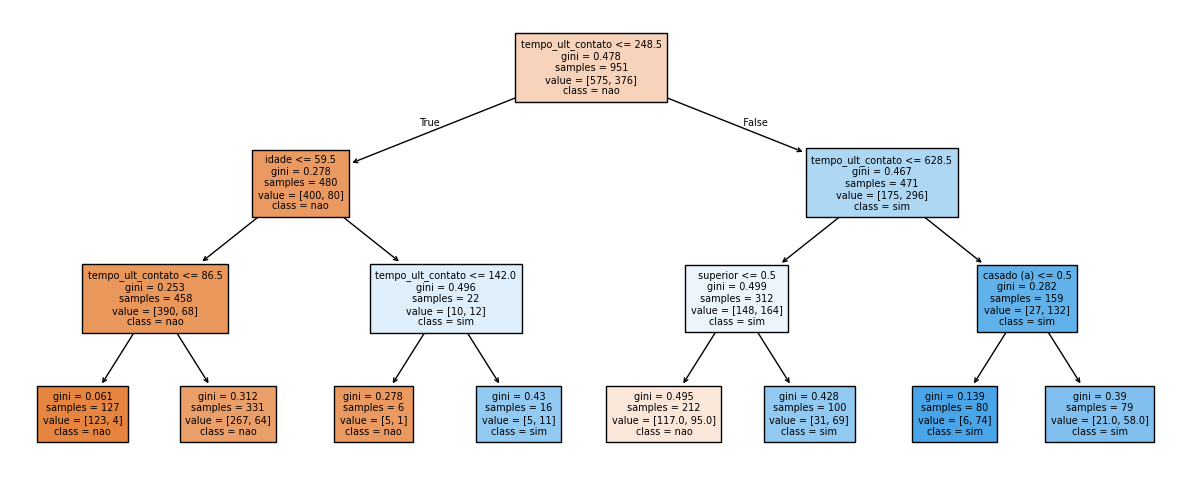

In [22]:
plt.figure(figsize=(15,6))

plot_tree(arvore,filled=True, class_names=['nao', 'sim'], fontsize=7, feature_names=name_columns);

> **Normalizando para testar outro modelo**
---

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
normalizado = MinMaxScaler()

x_treino_normalizado = normalizado.fit_transform(x_treino)

pd.DataFrame(x_treino_normalizado)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.205882,0.065564,0.123734,0.032258
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.147059,0.045792,0.396527,0.032258
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.076036,0.335022,0.000000
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.573529,0.062866,0.315123,0.000000
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.148380,0.065847,0.129032
...,...,...,...,...,...,...,...,...,...,...,...,...
946,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.191176,0.044265,0.246382,0.129032
947,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.205882,0.028043,0.275687,0.032258
948,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.323529,0.042952,0.024964,0.129032
949,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.176471,0.042810,0.023878,0.000000


> **MODELO KNN**
---

In [33]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()

KNN.fit(x_treino_normalizado, y_treino)


KNeighborsClassifier()

In [34]:
x_teste_normalizado = normalizado.transform(x_teste)

> **AVALIAZAO DO MODELO**

In [35]:
KNN.score(x_teste_normalizado, y_teste)

0.6876971608832808

> **Escolhendo e salvando o modelo**

>**Escolhendo o Modelo**

In [36]:
print(f'Acuracia Dummy:{dummy.score(x_teste, y_teste)}')
print(f'Acuracia Arvore Descisão:{arvore.score(x_teste, y_teste)}')
print(f'Acuracia KNN:{KNN.score(x_teste_normalizado, y_teste)}')

Acuracia Dummy:0.6025236593059937
Acuracia Arvore Descisão:0.7160883280757098
Acuracia KNN:0.6876971608832808


>**Salvando o Modelo**

In [37]:
import pickle

In [40]:
# PROCESSANDO VARIAVEL CATEGORICA
with open('Modelo_one_hot.pkl', 'wb') as arquivo:
    pickle.dump(one_hot, arquivo)

In [43]:
# MODELO DE ARVORE DE DESCISÃO 
with open('Modelo_arvore.pkl', 'wb') as arquivo:
    pickle.dump(arvore, arquivo)

> **APLICANDO O MODELO EM NOVOS DADOS**

In [44]:
modelo_one_hot = pd.read_pickle('Modelo_one_hot.pkl')
modelo_arvore = pd.read_pickle('Modelo_arvore.pkl')

In [48]:
novo_dados =[ {
        "idade": 45,
        "estado_civil": "casado (a)",
        "escolaridade": "superior",
        "inadimplencia": "nao",
        "saldo": 242,
        "fez_emprestimo": "nao",
        "tempo_ult_contato": 587,
        "numero_contatos": 1,
        "aderencia_investimento": "sim"}]

base_nova = pd.DataFrame(novo_dados)


In [52]:
base_nova= base_nova.drop(columns='aderencia_investimento', axis=1)

In [58]:
base = modelo_one_hot.transform(base_nova)

In [59]:
modelo_arvore.predict(base)

array([1])